Bengaluru House pricing prediction

Downloading the datsaset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
print("Shape of Data :-",df.shape)

Shape of Data :- (13320, 9)


In [8]:
# These columns don’t add value for price prediction
df = df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
# counting the different types of values in our dataset
for column in df.columns:
    print(df[column].value_counts())
    print("*"*30)

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
******************************
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 B

In [10]:
# checking for missing values 
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
# Basic statistics of numerical columns
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


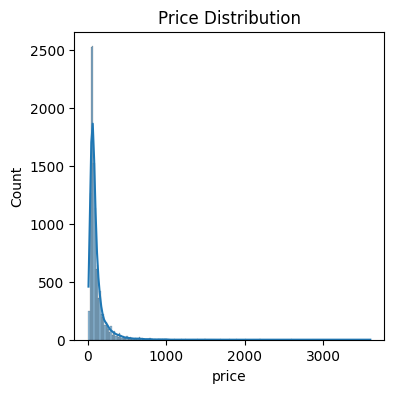

In [12]:
# visualizing the distribution of prices. 

plt.figure(figsize=(4,4))
sns.histplot(df['price'],kde=True)
plt.title("Price Distribution")
plt.show()

Data Cleaning

In [13]:
# Handling the Missing Values

# 1. dropping the rows where important column values are missing
df.dropna(subset=['size', 'total_sqft', 'price'],inplace=True)

# 2. filling the missing loaction value to unkown
df['location'].fillna("Unkown",inplace=True)

# 3 filling the bathroom missing values
df['bath'].fillna(df['bath'].median(),inplace=True)

# 4. filling the size column missing values.
df['size'].fillna(df['size'].mode(),inplace=True)


C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_6560\430580842.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna("Unkown",inplace=True)
C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_6560\430580842.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [14]:
# cheking for null values in data.
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
print("Shape of Data :-",df.shape)

Shape of Data :- (13304, 5)


In [16]:
# Feature Engineering

# 1. Creating a BHK Column for Describing the Size of house.
df['BHK']=df['size'].str.split().str.get(0).astype(int)

# Drop the original 'size' column
df.drop('size', axis=1, inplace=True)

# now droping the rows where number of room are more than 10
df[df.BHK>10].count()   # only 12 rows so we have to remov ethem they are outliers

df.drop(df[df['BHK'] > 10].index, inplace=True)


In [17]:
# 2. Cleaning the Total Square Feet Area.

    # some values in total_sqft are ranges like 2100-2850 we'll use their mean value.
def clean_sqft(x):
    try:
        if '-' in str(x):
            val=str(x).split('-')
            return (float(val[0])+float(val[1]))/2
        return float(x)
    
    except:
        return None
    

# Applying the cleaning function on total_sqft.
df['total_sqft']=df['total_sqft'].apply(clean_sqft)

In [18]:
# 3 creating a new column price per sqft
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

In [19]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13246.000000,13292.000000,13292.000000,13292.000000,1.324600e+04
mean,1556.758737,2.677851,112.408320,2.790776,7.909088e+03
std,1234.073453,1.251425,148.857577,1.191067,1.065415e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.270379e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.434783e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.310441e+03
max,52272.000000,14.000000,3600.000000,10.000000,1.200000e+07


In [20]:
# # 4. handling the location column

#     # stripping the extra space in loaction column
df['location']=df['location'].apply(lambda x : x.strip())

#     # replacing the location name whose values counts in data is less than 10 with 'others'.
loaction_stats=df['location'].value_counts(ascending=False)

location_less_than_10=loaction_stats[loaction_stats<=10]

df['location']=df['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)



Removing the outliers

Some values in dataset are outliers which does not satisfy the neccessary criteria of dataset so we are handling them here.

In [21]:
# 1 Removing the houses which are very samll in size logically they can't exists.

df=df[df['total_sqft']/df['BHK']>=300]

# Explanation: On average, a BHK should have at least 300 sqft. Homes smaller than this are unrealistic and likely data errors.

In [22]:
# 2 . Removing the outlier from price per sqft column
def remove_outlier_sqft(dff):
    df_output=pd.DataFrame()

    for key,subdf in dff.groupby('location'):
        m=np.mean(subdf.price_per_sqft)

        st=np.std(subdf.price_per_sqft)

        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]

        df_output=pd.concat([df_output,gen_df],ignore_index=True)

    return df_output

df = remove_outlier_sqft(df)


In [23]:
# 3. Removing the Outliers from data where BHK price per sqft is not possible
def BHK_outlier_Removal(dff):
    exclude_indices = []

    for location, location_df in dff.groupby('location'):
        BHK_stats = {}

        # Compute mean & std for each BHK in this location
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        
        # Compare each BHK with the previous (BHK-1)
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK - 1)

            if stats and stats['count'] > 5:
                # Drop rows where bigger BHK has lower price per sqft than smaller BHK’s mean
                exclude_indices.extend(
                    BHK_df[BHK_df.price_per_sqft < stats['mean']].index.values
                )
            
    return dff.drop(exclude_indices, axis='index')


In [24]:
df = BHK_outlier_Removal(df)


In [25]:
# 4. Removing the houses which have large number of bathrooms available

df=df[df['bath']<=df['BHK']+1]

# Explanation: A 2 BHK house cannot reasonably have 6 bathrooms — those are likely incorrect entries.

In [26]:
# now we remove the price_per_sqft column from data because it is used only for the outliers removing
df.drop(columns=['price_per_sqft'],inplace=True)

Now our data is cleaned and preprocessed.

Model Building for our dataset.

1. Converting the data for our model use.

2. Creating the model.


In [27]:
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [28]:
df.shape

(7273, 5)

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. Train-Test Split

X = df.drop('price', axis=1)  
y = df['price']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#  Preprocessing

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)



In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#  Define Models + Hyperparameters

pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", LinearRegression())])  # placeholder model

param_grid = [
    {
        "model": [LinearRegression()]
    },
    {
        "model": [Ridge()],
        "model__alpha": [0.01, 0.1, 1, 10, 100]
    },
    {
        "model": [Lasso()],
        "model__alpha": [0.01, 0.1, 1, 10, 100]
    },
    {
        "model": [RandomForestRegressor(random_state=42)],
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    },
    {
        "model": [GradientBoostingRegressor(random_state=42)],
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7]
    }
]

In [32]:
#  GridSearchCV for Best Model + Best Params

grid_search = GridSearchCV(pipeline,
                           param_grid,
                           cv=5,
                           scoring="r2",
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['total_sqft',
                                                                          'bath',
                                                                          'BHK']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['location'])])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearRegression()]}...
                          'model__alpha': [0.01, 0.1, 1, 10, 100]},
                         {'model': [RandomForestRegressor(random_state=42)],
                          'model__max_depth': [None, 10, 20],
                          'model__min_samples_split': [2, 5, 10],
                          'model__n_estimators': [100, 200, 300]},
                         {'model': [GradientBoostingRegressor(random_state=42)],
                          'model__learning_rate': [0.01, 0.05, 0.1],
                          'model__max_depth': [3, 5, 7],
                          'model__n_estimators': [100, 200, 300]}],
             scoring='r2', verbose=2)

In [33]:
print("Best Model:", grid_search.best_estimator_["model"])
print("Best Params:", grid_search.best_params_)

Best Model: Ridge(alpha=1)
Best Params: {'model': Ridge(), 'model__alpha': 1}


In [34]:
# prediction on test data
y_pred = grid_search.predict(X_test)

# checking the prediction result of model.
from sklearn.metrics import r2_score, mean_squared_error

print("Test R2 Score:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2_score the closer to 1 is the better
# Lower RMSE = Better model performance.

Test R2 Score: 0.8264193340325702
Test RMSE: 34.32082537468439


Our Best model is predicting our test data in a very proficience way now we can deploy our model. 

Saving Decision Tree Model

In [35]:
import joblib
joblib.dump(grid_search.best_estimator_, "house_price_model.pkl")


['house_price_model.pkl']

In [43]:


# storing the locations in loaction .pkl file for showing the dropbox in live app
locations = sorted(X['location'].unique())

joblib.dump(list(locations), "locations.pkl")
print("Locations saved successfully!")


Locations saved successfully!
